## Observations and Insights 

#### The results over the 45 days of the study show that Capomulin is the most effective treatment when compared to the 9 other treatment regimens. One treatment that does show promise alongside Capomulin is Ramicine. Both treatments show close to comparable quartile ranges as well as a close Interquartile Range at 7.781863 and 9.098537 respectively. Additionally, neither treatment has any outliers skewing the data. While the Capomulin treatment does appear to have the best effect at reducing tumor volume significantly, Ramicine should be considered and further researched as an additional treatment for future studies. When observing the mice treated by Capomulin, the data show that the weight of mice may determine the tumor volume. On average, smaller mice have smaller tumors and larger mice have larger tumors. It may be worth considering testing different treatment regimens on mice by weight to discover if smaller or larger tumors need more of less time for treatment. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%reload_ext nb_black

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

merged_data = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<IPython.core.display.Javascript object>

In [2]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].nunique()
number_of_mice

249

<IPython.core.display.Javascript object>

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#create dataframe of mouse id and timepoint columns
duplicate_mice_df = merged_data[["Mouse ID", "Timepoint"]]

#select duplicate rows across all columns in duplicate_mice_df
duplicates = duplicate_mice_df[duplicate_mice_df.duplicated(keep="first")]

duplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


<IPython.core.display.Javascript object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data["Mouse ID"] == "g989"]

#display duplicate mouse data
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


<IPython.core.display.Javascript object>

#### Note: In the duplicate timepoints for mouse # g989, the data shows that the tumor volumes are not duplicated but different for each timepoint duplication. It appears that two different measurements were taken at the same timepoints with different results. Considering that we do not know which timepoint has the correct tumor volume measurement, it makes the most sense to drop all rows for mouse # g989 so as not to use incorrect data in analysis. 

In [5]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse = merged_data[merged_data["Mouse ID"] == "g989"].index

#drop all rows of the duplicate mouse
clean_df = merged_data.drop(duplicate_mouse)

<IPython.core.display.Javascript object>

In [6]:
# Checking the number of mice in the clean DataFrame.
updated_mice_number = clean_df["Mouse ID"].nunique()

updated_mice_number

248

<IPython.core.display.Javascript object>

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean",
                                                                "median",
                                                                "var",
                                                                "std",
                                                                "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>

## Bar and Pie Charts

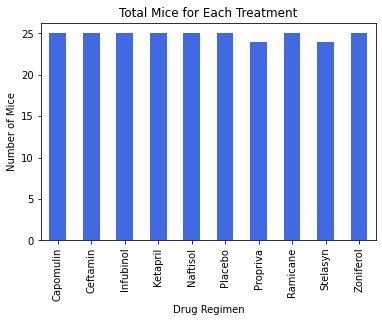

<IPython.core.display.Javascript object>

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()

#create bar chart
mice_plot = total_mice.plot(kind="bar", title="Total Mice for Each Treatment", color="royalblue")
mice_plot.set_ylabel("Number of Mice")
plt.savefig("Images/total_mice.png")
plt.show()

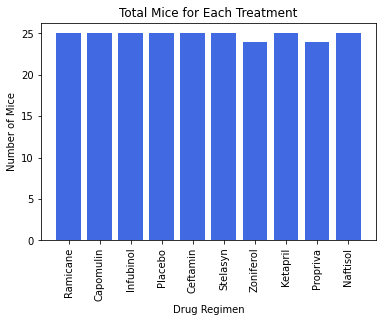

<IPython.core.display.Javascript object>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens

#create bar chart
plt.title("Total Mice for Each Treatment")
plt.bar(drug_regimens, total_mice, color="royalblue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()

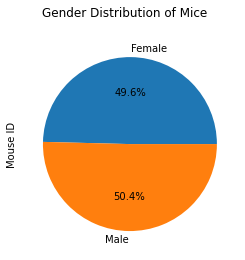

<IPython.core.display.Javascript object>

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_gender = clean_df.groupby(["Sex"])["Mouse ID"].nunique().to_frame()

#create pie chart
mice_by_gender.plot(kind="pie", subplots="True", title="Gender Distribution of Mice", autopct="%1.1f%%", legend=False)
plt.savefig("Images/gender.png")
plt.show()

In [11]:
#display number of mice by gender to create sizes list for pie chart
mice_by_gender

,Mouse ID
Sex,
Female,123
Male,125


<IPython.core.display.Javascript object>

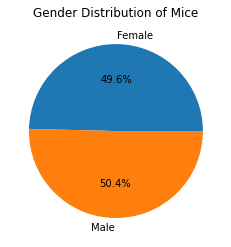

<IPython.core.display.Javascript object>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create variables for pie chart
sizes = [123, 125]
labels = ["Female", "Male"]
colors = ["tab:blue", "tab:orange"]

#create pie chart
plt.title("Gender Distribution of Mice")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate final tumor volume of each mouse across four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()

#create smaller df to merge with last_timepoint df
tumor_vol = clean_df[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]

# Merge merge last_timepoint df with tumor_vol dataframe to get tumor volume at last timepoint
last_tumor_volume = pd.merge(last_timepoint, tumor_vol, on=["Mouse ID", "Timepoint"], how="inner")
last_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


<IPython.core.display.Javascript object>

In [14]:
#calculate final tumor volume of each mouse across 4 drug treatment regimens and put into series
capomulin = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

#combined for ploting the boxplot later
boxplot_data = [capomulin, ramicane, infubinol, ceftamin]

<IPython.core.display.Javascript object>

In [15]:
# Determine outliers using upper and lower bounds

# create dataframe for calculating quartiles, IQR, max, min, and lower bounds for each treatment regimen
calculation_data_df = pd.DataFrame({
    "Capomulin" : capomulin,
    "Ramicane" : ramicane,
    "Infubinol" : infubinol,
    "Ceftamin" : ceftamin
})

#calculate quartiles 
Q1 = calculation_data_df.quantile(0.25)
Q3 = calculation_data_df.quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#calculate min and max
min_volume = calculation_data_df.min()
max_volume = calculation_data_df.max()

#establish bounds
lower_bounds = (Q1 - (1.5 * IQR))
upper_bounds = (Q3 + (1.5 * IQR))

#create data frame to display output

quartile_data_df = pd.DataFrame({
    "Quartile 1" : Q1,
    "Quartile 3" : Q3,
    "IQR" : IQR,
    "Lower Bounds" : lower_bounds,
    "Upper Bounds" : upper_bounds,
    "Min" : min_volume,
    "Max" : max_volume,
})

quartile_data_df

,Quartile 1,Quartile 3,IQR,Lower Bounds,Upper Bounds,Min,Max
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,23.343598,47.685963
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,22.050126,45.220869
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,36.321346,72.226731
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,45.000000,68.923185


<IPython.core.display.Javascript object>

### Determining Outliers:
#### After creating the data frame to check for outliers, it is determined that Infubinol will have at least one outlier. When comparing the maximum and minimum tumor volume to the upper and lower bounds it was discovered on the lower bound of Infubinol. Infubinol has a lower bound of 36.832905 with a minimum tumor volume of 36.321346. This lands this tumor volume just outside the lower bound. The maximum and minimum tumor volumes for Capomulin, Ramicane, and Ceftamin all fall within each treatments respective bounds.

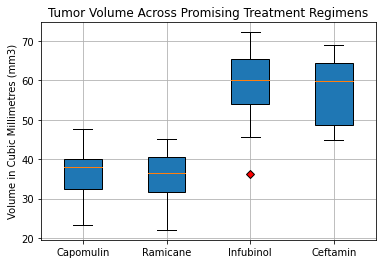

<IPython.core.display.Javascript object>

In [32]:
# x-axis boxplot labels
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#formatting for outliers
outlier_format = dict(markerfacecolor = "red", marker = "D")

#create boxplot
plt.title("Tumor Volume Across Promising Treatment Regimens")
plt.ylabel("Volume in Cubic Millimetres (mm3)")
plt.boxplot(boxplot_data, labels=labels, flierprops=outlier_format, patch_artist=True)
plt.grid()
plt.savefig("Images/boxplot.png")
plt.show()

## Line and Scatter Plots

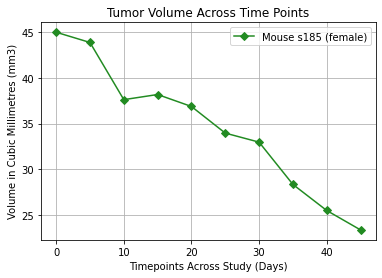

<IPython.core.display.Javascript object>

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#create new df for all data with one mouse that had the Capomulin treatment
capomulin_mouse = clean_df[clean_df["Mouse ID"] == "s185"]

#create series for plotting x axis and y axis
s185_timepoints = capomulin_mouse["Timepoint"]
s185_tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]

#create line plot
plt.title("Tumor Volume Across Time Points")
plt.ylabel("Volume in Cubic Millimetres (mm3)")
plt.xlabel("Timepoints Across Study (Days)")
plt.plot(s185_timepoints, s185_tumor_vol, color="forestgreen", label="Mouse s185 (female)", marker="D")
plt.legend()
plt.grid()
plt.savefig("Images/line_plot.png")
plt.show()

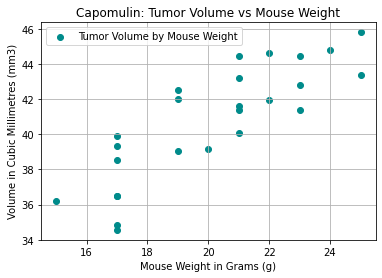

<IPython.core.display.Javascript object>

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#create df for all mice that were treated with Capomulin
capommulin_data_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

#create series for mouse weight and avg tumor volume grouped by mouse id
mouse_weight = capommulin_data_df.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor_vol = capommulin_data_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#create scatter plot
plt.title("Capomulin: Tumor Volume vs Mouse Weight")
plt.scatter(mouse_weight, avg_tumor_vol, color="darkcyan", label="Tumor Volume by Mouse Weight")
plt.grid()
plt.legend()
plt.xlabel("Mouse Weight in Grams (g)")
plt.ylabel("Volume in Cubic Millimetres (mm3)")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#create x and y for training the model
X = [[e] for e in mouse_weight]
y = avg_tumor_vol

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X, y)

#calculate correlation coefficient and display
model.coef_

array([0.95443969])

<IPython.core.display.Javascript object>

In [22]:
#create predict funtion for plotting
def predict_function(mouse_weight):
    return model.predict([[mouse_weight]])[0]

#test model
model.predict([[16]])[0]

36.82319555707069

<IPython.core.display.Javascript object>

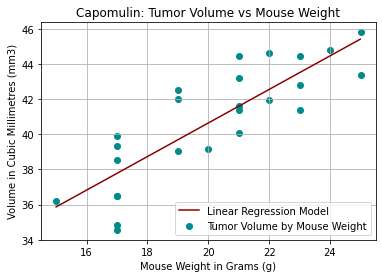

<IPython.core.display.Javascript object>

In [35]:
#create range and predict for plotting
x_range = np.arange(min(mouse_weight), max(mouse_weight), 0.01)
predict_tumor_vol = [predict_function(e) for e in x_range]

#create variables for y-ticks
min_y = min(avg_tumor_vol)
max_y = max(avg_tumor_vol)

#use previous scatter plot and include linear regression model
plt.title("Capomulin: Tumor Volume vs Mouse Weight")
plt.scatter(mouse_weight, avg_tumor_vol, color="darkcyan", label="Tumor Volume by Mouse Weight")
plt.grid()
plt.xlabel("Mouse Weight in Grams (g)")
plt.ylabel("Volume in Cubic Millimetres (mm3)")
plt.plot(x_range, predict_tumor_vol, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/scatter_plot.png")
plt.show()